# Root mean square propagation (RMSprop)

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 120
n1 = n//2
n2 = 15
eta = 0.3 #learning rate

Nepoch = 2500
Nbatch = 12
Batchsize = 10

epsi = 10**(-8)

In [3]:
# ETAPE 2

# génération des données d'apprentissage

U = (np.random.rand(n)).reshape(1,n)
X = np.zeros(n).reshape(1,n)
X[0][:n1] = np.sin(2*np.pi*U[0][:60])
X[0][n1:] = np.exp(U[0][60:])-1

y = np.zeros(n).reshape(1,n)
y[0][:n1] = 1
y[0][n1:] = 0

In [4]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

def softmax(z):
    
    u = 1.0/np.sum(np.exp(z), axis=0)
    
    return u*np.exp(z)

In [5]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(1,n2)
b3 = np.random.randn(1,1)

In [6]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def compute_grad(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = sigma(z3)

    # Calcul
    delta3 = (a3-y)*sigmaprime(z3)
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    dCdW3 = np.dot(delta3,a2.T)
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [7]:
# ETAPE 6

# Définition de la fonction coût

def cost(y,y_pred):
    return (1/2*n)*(np.linalg.norm(y-y_pred))**2

In [8]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = sigma(z3)
     
    return a3

In [9]:
Cost = np.zeros(Nepoch)
Acc = np.zeros(Nepoch)
beta = 0.9


dCdW2_avg = np.zeros(W2.shape)
dCdW3_avg = np.zeros(W3.shape)
dCdb2_avg = np.zeros(b2.shape)
dCdb3_avg = np.zeros(b3.shape)

HkW2=np.zeros(W2.shape)
HkW3=np.zeros(W3.shape)
Hkb2=np.zeros(b2.shape)
Hkb3=np.zeros(b3.shape)

for k in range(Nepoch):
    
    # Votre code ici
    
    # Mélanger des données
    (X,y) = shuffle(X.T,y.T)
    X = X.T
    y = y.T
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)
    Acc[k] = 1-0.5*np.sum(np.abs(np.round(y_pred)-y))/n
    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize

            xi = X[0][u+i]
            yi = y[0][u+i]
            
            gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
            
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3
            
        dCdW2_avg = beta*dCdW2_avg + (1-beta)*dCdW2*dCdW2
        dCdW3_avg = beta*dCdW3_avg + (1-beta)*dCdW3*dCdW3
        dCdb2_avg = beta*dCdb2_avg + (1-beta)*dCdb2*dCdb2
        dCdb3_avg = beta*dCdb3_avg + (1-beta)*dCdb3*dCdb3
            
        HkW2=1/(np.sqrt(dCdW2_avg+epsi))
        HkW3=1/(np.sqrt(dCdW3_avg+epsi))
        Hkb2=1/(np.sqrt(dCdb2_avg+epsi))
        Hkb3=1/(np.sqrt(dCdb3_avg+epsi))
        
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*HkW2*dCdW2
        W3 = W3 - (eta/Batchsize)*HkW3*dCdW3
        b2 = b2 - (eta/Batchsize)*Hkb2*dCdb2
        b3 = b3 - (eta/Batchsize)*Hkb3*dCdb3


In [10]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.93492886e-01,
        1.00000000e+00, 1.00000000e+00, 6.64738316e-04, 6.89519451e-01,
        9.99998421e-01, 6.99422006e-01, 2.83902476e-01, 3.03069320e-01,
        6.00295435e-01, 2.87603254e-01, 1.00000000e+00, 6.91501566e-01,
        1.00000000e+00, 1.41025735e-05, 6.94724354e-01, 2.59405777e-01,
        1.00000000e+00, 5.01873225e-01, 2.65776230e-01, 1.62777341e-02,
        2.67652188e-01, 1.00000000e+00, 2.04214751e-02, 6.79305589e-01,
        2.97733750e-01, 1.00000000e+00, 7.07033624e-01, 6.19831490e-01,
        2.04848531e-04, 7.05874422e-01, 5.64868422e-01, 3.32999578e-01,
        6.94668435e-01, 1.03509895e-04, 2.75790867e-01, 2.91315889e-01,
        9.99999999e-01, 3.44623914e-01, 1.00000000e+00, 4.25172358e-01,
        7.12663188e-06, 7.09993541e-01, 1.06494972e-04, 9.99999998e-01,
        2.62273871e-01, 2.74354644e-01, 1.00000000e+00, 3.19665825e-01,
        9.99416690e-01, 2.97758418e-01, 6.91470744e-01, 4.175520

In [11]:
def classification(y_true,y_pred):
    return 1-0.5*np.sum(np.abs(np.round(y_pred)-y))/n


In [12]:
# génération des données d'apprentissage

U = (np.random.rand(n)).reshape(1,n)
X = np.zeros(n).reshape(1,n)
X[0][:n1] = np.sin(2*np.pi*U[0][:60])
X[0][n1:] = np.exp(U[0][60:])-1

y = np.zeros(n).reshape(1,n)
y[0][:n1] = 1
y[0][n1:] = 0

In [13]:
print('Niveau de précision : ',classification(y,y_pred)*100)

Niveau de précision :  76.25


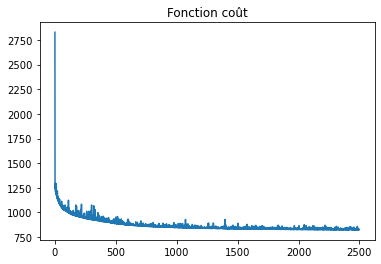

In [14]:
plt.figure()
plt.plot(Cost)
plt.title('Fonction coût')
plt.show()

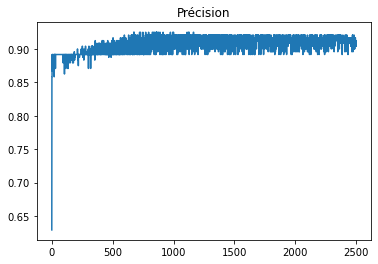

In [15]:
plt.figure()
plt.plot(Acc)
plt.title('Précision')
plt.show()